### Background 
>> 1. The CEO of the NGO needs to decide how to use this money strategically and effectively
>> 2. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid

### Key Objectives
>> 1. As a Data Analyst categorise the countries using some socio-economic and health factors that determine the overall development of the country
>> 2. Then suggest the countries which the CEO needs to focus on the most

### Approach
>> 1. Perform Outlier Analysis and decide to retain or remove variables
>> 2. Perform PCA on the dataset and obtain the new dataset with the Principal Components. 
>>> 2.1 Choose the appropriate number of components k
>>> 2.2 Perform clustering activity on this new dataset, i.e. the PCA modified dataset with the k components
>> 3. Perform Outlier Analysis again and decide to retain or remove variables
>> 4. Clustering: Try both 
>>> 4.1 K-means and 
>>> 4.2 Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters
>>> 4.3 Analyse the clusters and identify the ones which are in dire need of aid. Analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries
>> 5. Visualizations: Perform visualisations on the clusters that have been formed 
>>> 5.1 Choose the first two Principal Components (on the X-Y axes) and plotting a scatter plot of all the countries and differentiating the clusters. 
>>> 5.2 Do the same visualisation using any two of the original variables (like gdpp, child_mort, etc.) on the X-Y axes as well
>> 6. Decide Final list of countries: The final list of countries depends on the number of components chosen and the number of clusters that finally form. 
>> 7. Report: Report back at least 5 countries which are in direst need of aid from the analysis work

In [215]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import IncrementalPCA

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [132]:
country_df = pd.read_csv("Country-data.csv")

### 1. Performing basic EDA to explore the shape, columns, data types and missing values

In [133]:
country_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [134]:
country_df.shape

(167, 10)

In [135]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [257]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [136]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Observations:
>> 1. Dont think any data type changes are required
>> 2. There aren't any issing values across columns as well
>> 3. There are no categorical variables for which we need dummy variables creation

In [137]:
country_num_df = country_df.drop('country',axis=1)

### 2. Outlier Analysis - Before Doing PCA

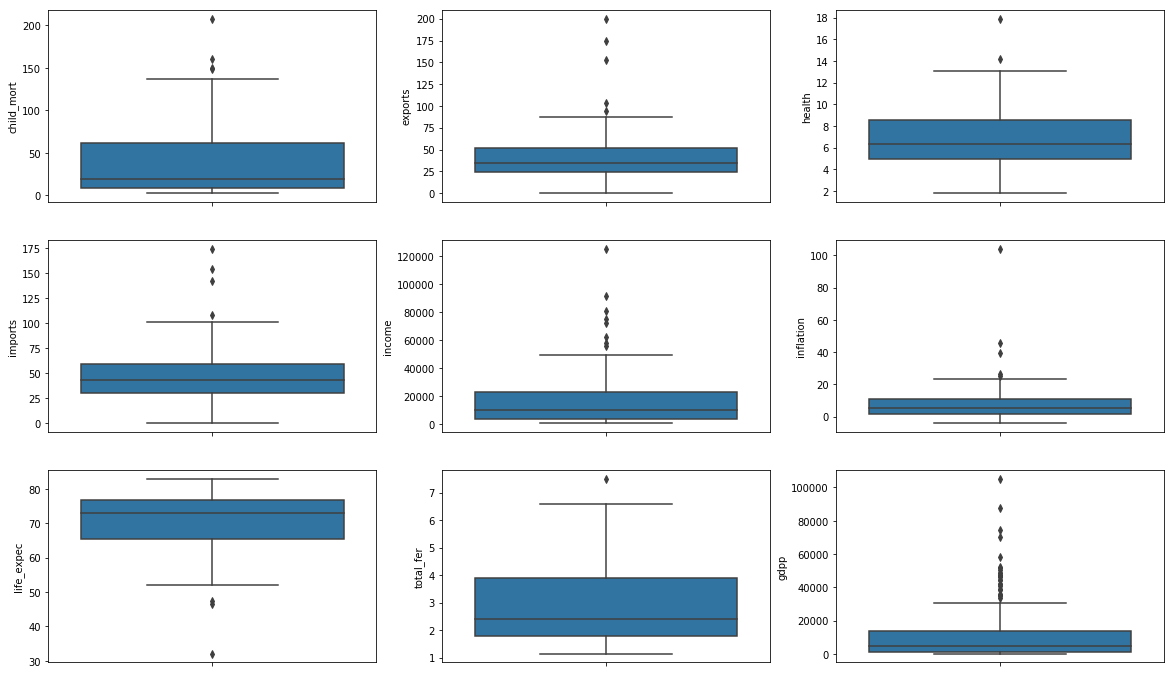

In [251]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'child_mort', data = country_num_df)
plt.subplot(3,3,2)
sns.boxplot(y = 'exports', data = country_num_df)
plt.subplot(3,3,3)
sns.boxplot(y = 'health', data = country_num_df)
plt.subplot(3,3,4)
sns.boxplot(y = 'imports', data = country_num_df)
plt.subplot(3,3,5)
sns.boxplot(y = 'income', data = country_num_df)
plt.subplot(3,3,6)
sns.boxplot(y = 'inflation', data = country_num_df)
plt.subplot(3,3,7)
sns.boxplot(y = 'life_expec', data = country_num_df)
plt.subplot(3,3,8)
sns.boxplot(y = 'total_fer', data = country_num_df)
plt.subplot(3,3,9)
sns.boxplot(y = 'gdpp', data = country_num_df)
plt.show()

In [255]:
Q1 = country_df.gdpp.quantile(0.05)
Q3 = country_df.gdpp.quantile(0.95)
IQR = Q3 - Q1
country_df[(country_df.gdpp <= (Q1 - 1.5*IQR)) | (country_df.gdpp >= (Q3 + 1.5*IQR))].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [256]:
Q1 = country_df.income.quantile(0.05)
Q3 = country_df.income.quantile(0.95)
IQR = Q3 - Q1
country_df[(country_df.income <= (Q1 - 1.5*IQR)) | (country_df.income >= (Q3 + 1.5*IQR))].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300


In [258]:
Q1 = country_df.child_mort.quantile(0.05)
Q3 = country_df.child_mort.quantile(0.95)
IQR = Q3 - Q1
country_df[(country_df.child_mort <= (Q1 - 1.5*IQR)) | (country_df.child_mort >= (Q3 + 1.5*IQR))].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [259]:
Q1 = country_df.life_expec.quantile(0.05)
Q3 = country_df.life_expec.quantile(0.95)
IQR = Q3 - Q1
country_df[(country_df.life_expec <= (Q1 - 1.5*IQR)) | (country_df.life_expec >= (Q3 + 1.5*IQR))].head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Not many major outliers. Also, since the quantity of data is less it is better to retain all the values and perform Standardization

### 3. Standardization

In [138]:
## First let us see if we can explain the dataset using fewer variables
standard_scaler = StandardScaler()
country_num_std_df = standard_scaler.fit_transform(country_num_df)

C:\Users\91810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\91810\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [139]:
country_num_std_df

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### 4. Performing PCA

In [140]:
# PCA Initialization
pca = PCA(svd_solver='randomized', random_state=42)

In [141]:
# Performing PCA
pca.fit(country_num_std_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [142]:
#List of PCA components.
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [143]:
#Let's check the variance ratios
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

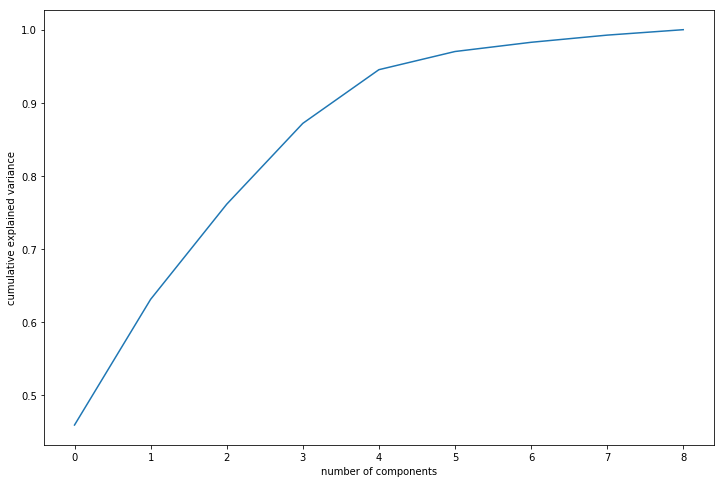

In [144]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Observation
>> Around 95% of the variace is explained by 4 components

In [145]:
#Understanding how the original 9 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(country_num_df.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.419519,0.192884,-0.029544,0.370653
1,exports,0.283897,0.613163,0.144761,0.003091
2,health,0.150838,-0.243087,-0.596632,0.461897
3,imports,0.161482,0.671821,-0.299927,-0.071907
4,income,0.398441,0.022536,0.301548,0.392159
5,inflation,-0.193173,-0.008404,0.642520,0.150442
6,life_expec,0.425839,-0.222707,0.113919,-0.203797
7,total_fer,-0.403729,0.155233,0.019549,0.378304
8,gdpp,0.392645,-0.046022,0.122977,0.531995


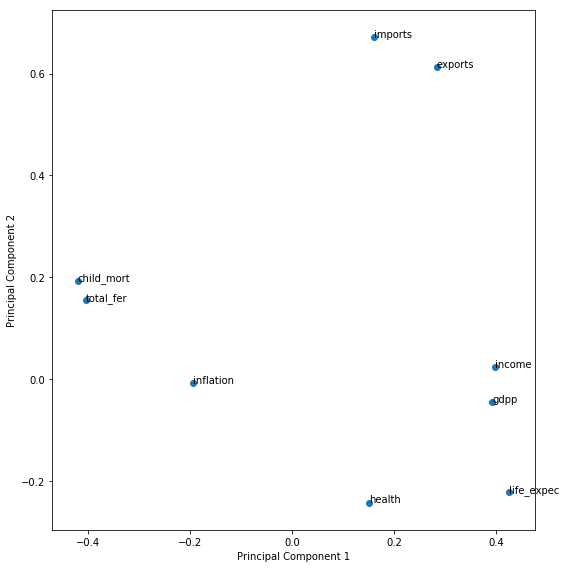

In [146]:
# Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

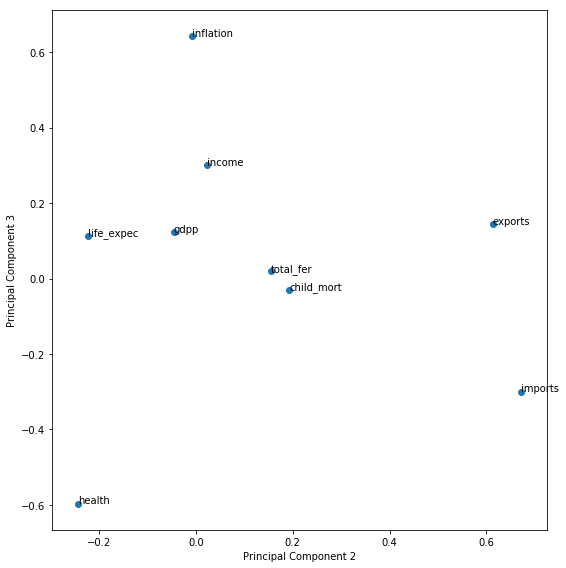

In [147]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC2, pcs_df.PC3)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC2[i],pcs_df.PC3[i]))
plt.tight_layout()
plt.show()

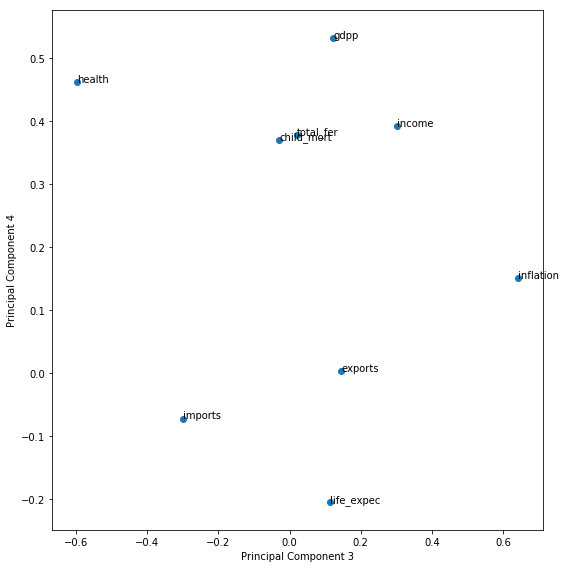

In [148]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC3, pcs_df.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC3[i],pcs_df.PC4[i]))
plt.tight_layout()
plt.show()

### Observations
>> 1. PC1 is in the direction where "gdpp","life_expec" and "income" are high
>> 2. PC2 is in the direction where "imports", "export" are high
>> 3. PC3 is in the direction where "inflation" is high
>> 4. PC4 is in the direction where "gdpp", "health" are high

In [149]:
# let PCA select the number of principal components
pca_again = PCA(0.90)

In [151]:
pca2_df = pca_again.fit_transform(country_num_std_df)
pca2_df.shape

(167, 5)

In [152]:
# Therefore, selecting 5 principal components
pca_final = IncrementalPCA(n_components=5)

In [161]:
pca_final_np = pca_final.fit_transform(country_num_std_df)
pca_final_np.shape

(167, 5)

In [162]:
type(pca_final_np)

numpy.ndarray

In [163]:
pca_final_np

array([[-2.91299992e+00,  9.19694483e-02, -7.21242475e-01,
         1.00183771e+00, -1.46764708e-01],
       [ 4.29869882e-01, -5.89373005e-01, -3.28611009e-01,
        -1.16501385e+00,  1.53205240e-01],
       [-2.85288747e-01, -4.52138721e-01,  1.23205055e+00,
        -8.57767020e-01,  1.91227155e-01],
       [-2.93271361e+00,  1.69877055e+00,  1.52507602e+00,
         8.55595497e-01, -2.14777969e-01],
       [ 1.03337146e+00,  1.33852736e-01, -2.16699200e-01,
        -8.46637655e-01, -1.93186250e-01],
       [ 2.28903436e-02, -1.77273550e+00,  8.64499533e-01,
        -3.67466174e-02,  9.97895254e-01],
       [-1.01463164e-01, -5.67317984e-01,  2.48106950e-01,
        -1.46602345e+00, -8.58319260e-02],
       [ 2.34215326e+00, -1.98970971e+00,  1.98795068e-01,
         1.11341263e+00, -7.10653789e-01],
       [ 2.97384111e+00, -7.35152104e-01, -5.28284369e-01,
         1.20110137e+00,  8.01665136e-02],
       [-1.81302843e-01, -3.96894805e-01,  8.68398935e-01,
        -4.35201409e-01

In [164]:
# Creating a transpose so that the each column is properly arranged
pca_final_tp_np = np.transpose(pca_final_np)
pca_final_tp_np.shape

(5, 167)

In [165]:
type(pca_final_tp_np)

numpy.ndarray

In [166]:
# Creating a Dataframe
pca_final_df = pd.DataFrame({'PC1':pca_final_tp_np[0],'PC2':pca_final_tp_np[1], 'PC3':pca_final_tp_np[2], 'PC4':pca_final_tp_np[3], 
                       'PC5':pca_final_tp_np[4]})

In [167]:
pca_final_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


### 5. Outlier Analysis and Actions afer doing PCA

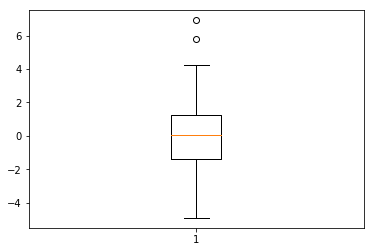

In [168]:
## Let's perform Outlier Analysis
# Let's do the outlier analysis before proceeding to clustering
# We can reassign the outliers to the clusters later
plt.boxplot(pca_final_df.PC1)
Q1 = pca_final_df.PC1.quantile(0.05)
Q3 = pca_final_df.PC1.quantile(0.95)
IQR = Q3 - Q1
pca_final_df = pca_final_df[(pca_final_df.PC1 >= (Q1 - 1.5*IQR)) & (pca_final_df.PC1 <= (Q3 + 1.5*IQR))]

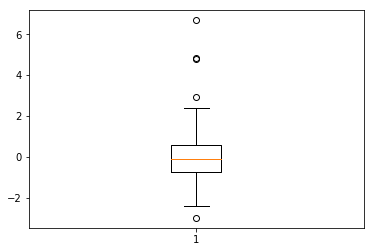

In [169]:
plt.boxplot(pca_final_df.PC2)
Q1 = pca_final_df.PC2.quantile(0.05)
Q3 = pca_final_df.PC2.quantile(0.95)
IQR = Q3 - Q1
pca_final_df = pca_final_df[(pca_final_df.PC2 >= (Q1 - 1.5*IQR)) & (pca_final_df.PC2 <= (Q3 + 1.5*IQR))]

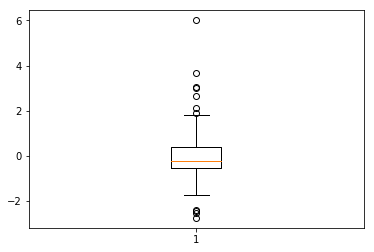

In [170]:
plt.boxplot(pca_final_df.PC3)
Q1 = pca_final_df.PC3.quantile(0.05)
Q3 = pca_final_df.PC3.quantile(0.95)
IQR = Q3 - Q1
pca_final_df = pca_final_df[(pca_final_df.PC3 >= (Q1 - 1.5*IQR)) & (pca_final_df.PC3 <= (Q3 + 1.5*IQR))]

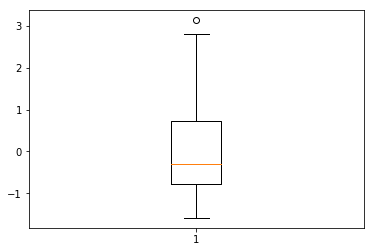

In [171]:
plt.boxplot(pca_final_df.PC4)
Q1 = pca_final_df.PC4.quantile(0.05)
Q3 = pca_final_df.PC4.quantile(0.95)
IQR = Q3 - Q1
pca_final_df = pca_final_df[(pca_final_df.PC4 >= (Q1 - 1.5*IQR)) & (pca_final_df.PC4 <= (Q3 + 1.5*IQR))]

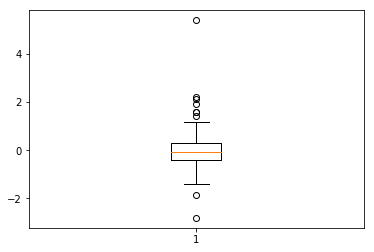

In [173]:
plt.boxplot(pca_final_df.PC5)
Q1 = pca_final_df.PC5.quantile(0.05)
Q3 = pca_final_df.PC5.quantile(0.95)
IQR = Q3 - Q1
pca_final_df = pca_final_df[(pca_final_df.PC5 >= (Q1 - 1.5*IQR)) & (pca_final_df.PC5 <= (Q3 + 1.5*IQR))]

In [174]:
pca_final_df.shape

(166, 5)

### 6. Clustering

#### 6.1 Hopkins Test - Determining Clustering Tendency

In [175]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [176]:
hopkins(pca_final_df)

0.7930563046977493

In [177]:
pca_final_df_km = pca_final_df

#### Since the value is > 0.5 the given dataset has a good tendency to form clusters.

#### 6.2 Finding the Optimal Number of Clusters - Silhouette Analysis

In [178]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_final_df_km)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_final_df_km, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.30472991041393127
For n_clusters=3, the silhouette score is 0.31388109894042077
For n_clusters=4, the silhouette score is 0.33243925995247847
For n_clusters=5, the silhouette score is 0.2626942715050597
For n_clusters=6, the silhouette score is 0.27955520983391924
For n_clusters=7, the silhouette score is 0.27049272567688387
For n_clusters=8, the silhouette score is 0.25517488276462075
For n_clusters=9, the silhouette score is 0.2274386285268286
For n_clusters=10, the silhouette score is 0.22587878897101804


In [179]:
#First we'll do the silhouette score analysis
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pca_final_df_km)
    sse_.append([k, silhouette_score(pca_final_df_km, kmeans.labels_)])

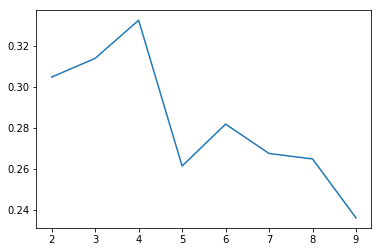

In [180]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

### Observation
>> Silhouette score is highest at number of clusters = 4. Therefore, selecting 4 clusters

#### 6.3 Finding the Optimal Number of Clusters - SSD Analysis

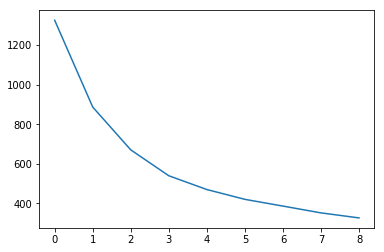

In [181]:
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_final_df_km)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

### 7. Modelling - KMeans Clustering

In [182]:
#Let's perform K means using K=4
kmeans_model = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
kmeans_model.fit(pca_final_df_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [184]:
pca_final_df_km['ClusterID'] = kmeans_model.labels_ 
pca_final_df_km.head(5)

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,1
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,1
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,0
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,1


In [185]:
pca_final_df_km['ClusterID'].value_counts()

1    86
0    47
2    30
3     3
Name: ClusterID, dtype: int64

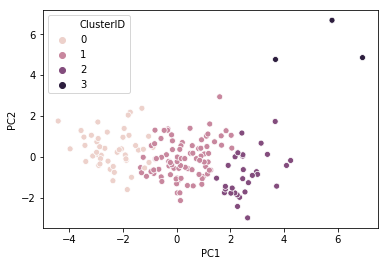

In [190]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=pca_final_df_km)

In [188]:
pca_final_df_km.shape

(166, 6)

In [195]:
# Merge cluster IDs with original dataset
country_df_clusID = pd.merge(country_df,pca_final_df_km,left_index=True,right_index=True)
country_df_clusID.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913000,0.091969,-0.721242,1.001838,-0.146765,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429870,-0.589373,-0.328611,-1.165014,0.153205,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285289,-0.452139,1.232051,-0.857767,0.191227,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932714,1.698771,1.525076,0.855595,-0.214778,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033371,0.133853,-0.216699,-0.846638,-0.193186,1


In [197]:
country_df_clusID = country_df_clusID.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
country_df_clusID.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


#### 7.1 Analyzing the Clusters

In [198]:
country_df_clusID['ClusterID'].value_counts()

1    86
0    47
2    30
3     3
Name: ClusterID, dtype: int64

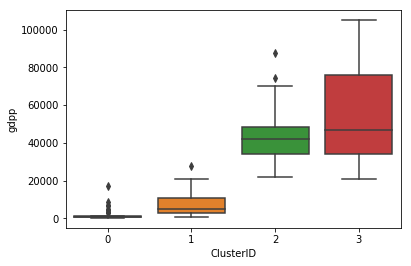

In [200]:
sns.boxplot(x='ClusterID',y='gdpp',data=country_df_clusID)

#### Observation #1 - "gdpp" increases from cluster 0 to cluster 3 in terms of mean and the spread as well

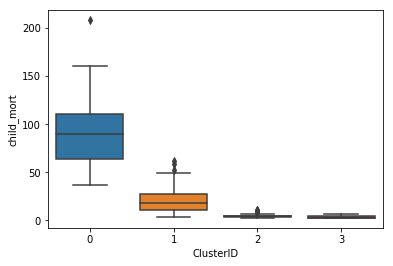

In [202]:
sns.boxplot(x='ClusterID',y='child_mort',data=country_df_clusID)

#### Observation #2 - "child mortality" decreases gradually from cluster 0 to cluster 3 in terms of mean and the spread as well
#### Observation #3 - Trend of "child mortality" is exact opposite of "gdpp"

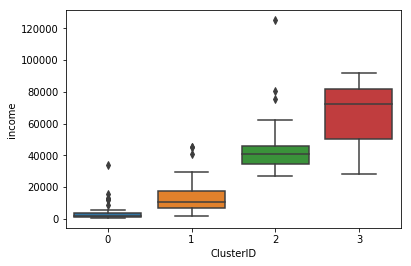

In [203]:
sns.boxplot(x='ClusterID',y='income',data=country_df_clusID)

#### Observation #4 - "Income" increases from cluster 0 to cluster 3 in terms of mean and the spread as well
#### Observation #5 - trend of "Income" is almost similar to "gdpp" which is expected

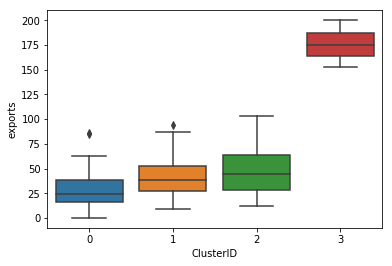

In [206]:
sns.boxplot(x='ClusterID',y='exports',data=country_df_clusID)

#### Observation #6 - "exports" increases from cluster 0 to cluster 3. This is similar to "Income" and "gdpp". However, for cluster 3 the exports see a huge jump

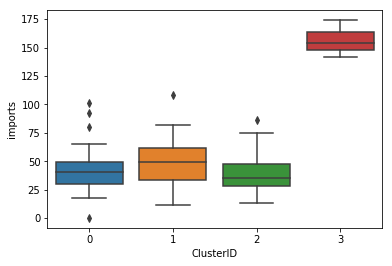

In [207]:
sns.boxplot(x='ClusterID',y='imports',data=country_df_clusID)

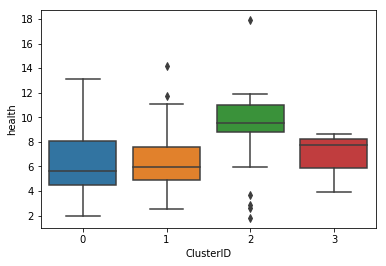

In [208]:
sns.boxplot(x='ClusterID',y='health',data=country_df_clusID)

#### Observation #7 - Cluster 2 has the highest average on Total health spending as %age of Total GDP

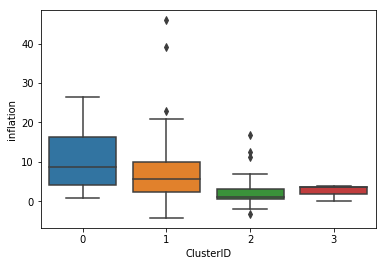

In [209]:
sns.boxplot(x='ClusterID',y='inflation',data=country_df_clusID)

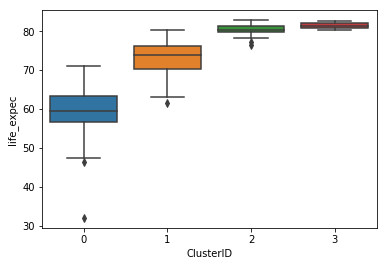

In [210]:
sns.boxplot(x='ClusterID',y='life_expec',data=country_df_clusID)

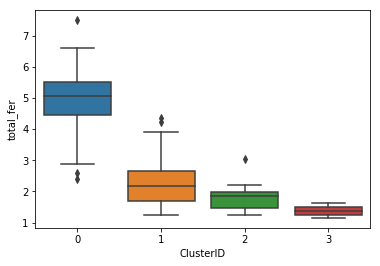

In [211]:
sns.boxplot(x='ClusterID',y='total_fer',data=country_df_clusID)

#### 7.2 Summary
> Cluster #3
>> 1. Highest in "gdpp", "exports", "imports" and "life_expectancy"
>> 2. Lowest in "child mortality" and "total fertility"

> Cluster #2
>> Second Highest or Second Lowest after Cluster #3 in most parameters expect - 
>> 1. Health (Total health spending as %age of Total GDP) - where it is the highest
>> 2. Inflation (The measurement of the annual growth rate of the Total GDP) - where it is the lowest (lower than Cluster #3)

> Cluster #1
>> Second lowest after Cluster #0 or Second Highest after Cluster #0 in most parameters expect -
>> 1. Imports - where it is the second highest after Cluster #3

> Cluster #0
>> 1. Highest in "total_fertility", "inflation" and "child mortality"
>> 2. Lowest in the remaining ones

### 8. Modelling - Hierarchial Clustering

In [213]:
pca_final_df_hc = pca_final_df.drop('ClusterID',axis=1)

#### 8.1 Single Linkage

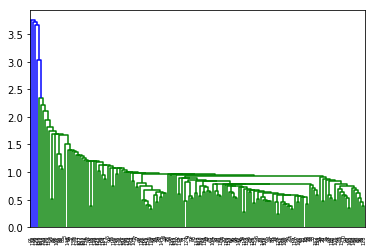

In [216]:
# single linkage
mergings = linkage(pca_final_df_hc, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### 8.2 Complete Linkage

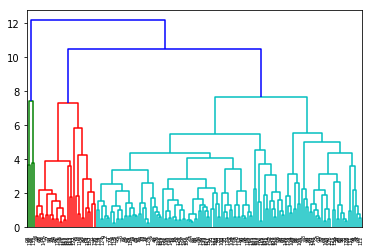

In [217]:
# complete linkage
mergings = linkage(pca_final_df_hc, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [218]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [219]:
country_df_clusID['cluster_labels'] = cluster_labels
country_df_clusID.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


#### 8.3 Analyzing the Clusters - Hierarchial Clustering

In [220]:
country_df_clusID['cluster_labels'].value_counts()

0    132
1     30
2      4
Name: cluster_labels, dtype: int64

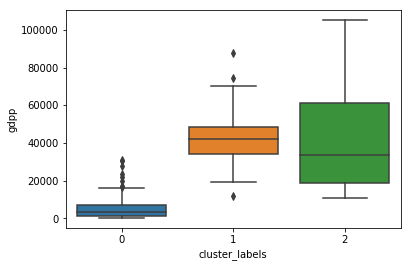

In [221]:
sns.boxplot(x='cluster_labels',y='gdpp',data=country_df_clusID)

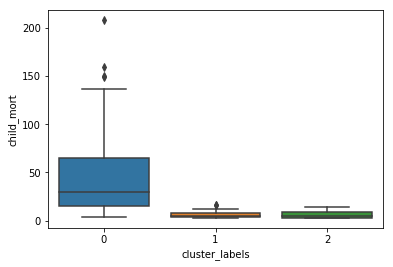

In [223]:
sns.boxplot(x='cluster_labels',y='child_mort',data=country_df_clusID)

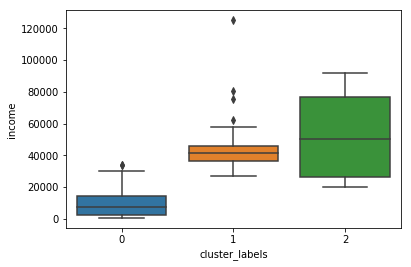

In [224]:
sns.boxplot(x='cluster_labels',y='income',data=country_df_clusID)

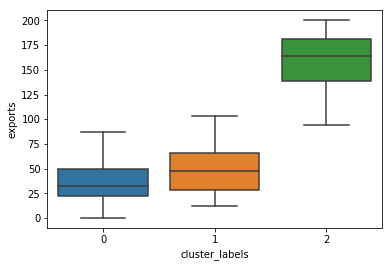

In [225]:
sns.boxplot(x='cluster_labels',y='exports',data=country_df_clusID)

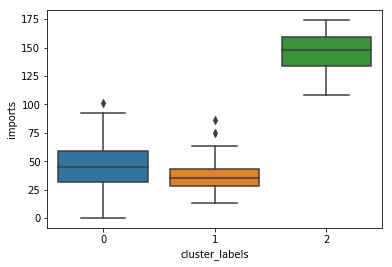

In [226]:
sns.boxplot(x='cluster_labels',y='imports',data=country_df_clusID)

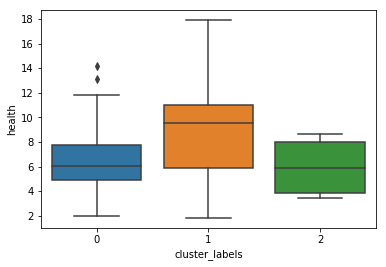

In [227]:
sns.boxplot(x='cluster_labels',y='health',data=country_df_clusID)

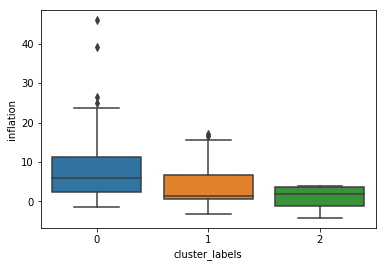

In [228]:
sns.boxplot(x='cluster_labels',y='inflation',data=country_df_clusID)

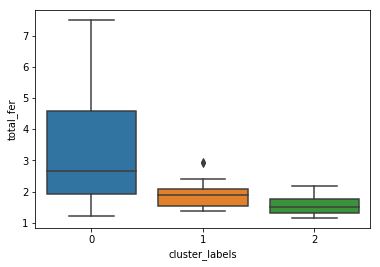

In [230]:
sns.boxplot(x='cluster_labels',y='total_fer',data=country_df_clusID)

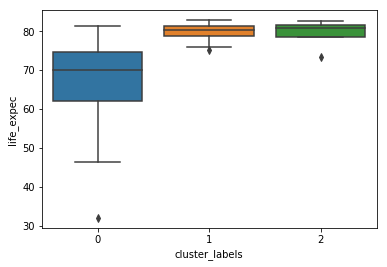

In [231]:
sns.boxplot(x='cluster_labels',y='life_expec',data=country_df_clusID)

### Observations
>> 1. The trend above is broadly similar to what was observed with KMeans except for the fact that now we have just 3 clusters instead of 4 
>> 2. Cluster #1 
>>> 2.1 Here Cluster #1 has the highest "gdpp" average and highest "health" (Total health spending as %age of Total GDP)
>>> 2.2 In other parameters it is broadly second highest or lowest compared to Cluster #2
>> 3. Cluster #2
>>> 3.1 Highest in "life expectancy", "imports", "exports" and "income"
>>> 3.2 Lowest in "Health" (Total health spending as %age of Total GDP)
>> 4. Cluster #0
>>> 4.1 Highest in "total fertility" (The number of children that would be born to each woman if the current age-fertility rates remain the same.), "inflation", "child mortality"
>>> 4.2 Lowest in "Life expectancy", "gdpp", "income", "exports

### 9. Comparing KMeans and Hierarchial Clustering results it is clear that 
#### Cluster #0 in KMeans and Cluster #0 of Hierarchial Clustering have lowest of values for "gdpp" and "income"
#### and highest of values for "child moratlity"

In [241]:
# Filtering country_df_clusID for ClusterID and cluster_labels for '0'
focus_countries_df = country_df_clusID.loc[((country_df_clusID['ClusterID'] == 0) & 
                                            (country_df_clusID['cluster_labels'] == 0)), ['country','gdpp','child_mort','income']]
focus_countries_df = focus_countries_df.reset_index()
focus_countries_df.head(5)

,index,country,gdpp,child_mort,income
0,0,Afghanistan,553,90.2,1610
1,3,Angola,3530,119.0,5900
2,17,Benin,758,111.0,1820
3,21,Botswana,6350,52.5,13300
4,25,Burkina Faso,575,116.0,1430


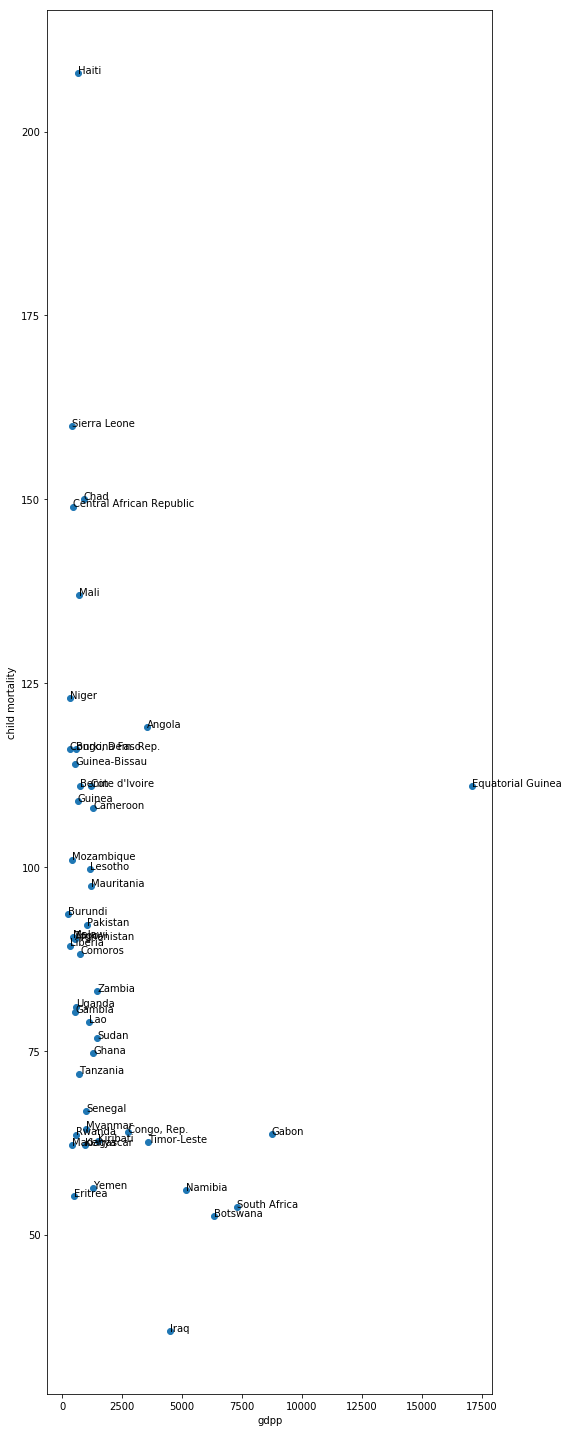

In [243]:
 # Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,20))
plt.scatter(focus_countries_df.gdpp, focus_countries_df.child_mort)
plt.xlabel('gdpp')
plt.ylabel('child mortality')
for i, txt in enumerate(focus_countries_df.country):
    plt.annotate(txt, (focus_countries_df.gdpp[i],focus_countries_df.child_mort[i]))
plt.tight_layout()
plt.show()

### Based on the above considering High Child Moratlity and Low gdpp. The top 5 countries needing aid could be
>> 1. Haiti
>> 2. Sierra Leone
>> 3. Chad
>> 4. Central African Republic
>> 5. Mali

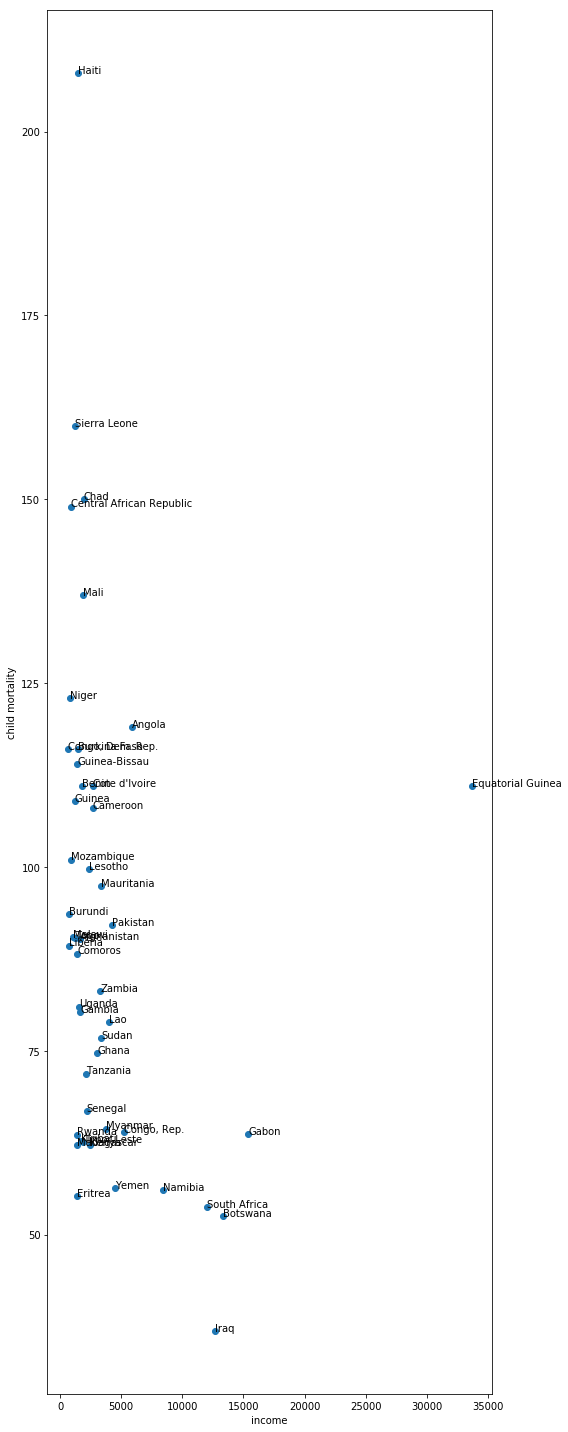

In [244]:
 # Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,20))
plt.scatter(focus_countries_df.income, focus_countries_df.child_mort)
plt.xlabel('income')
plt.ylabel('child mortality')
for i, txt in enumerate(focus_countries_df.country):
    plt.annotate(txt, (focus_countries_df.income[i],focus_countries_df.child_mort[i]))
plt.tight_layout()
plt.show()

### Again get the same 5 countries as above

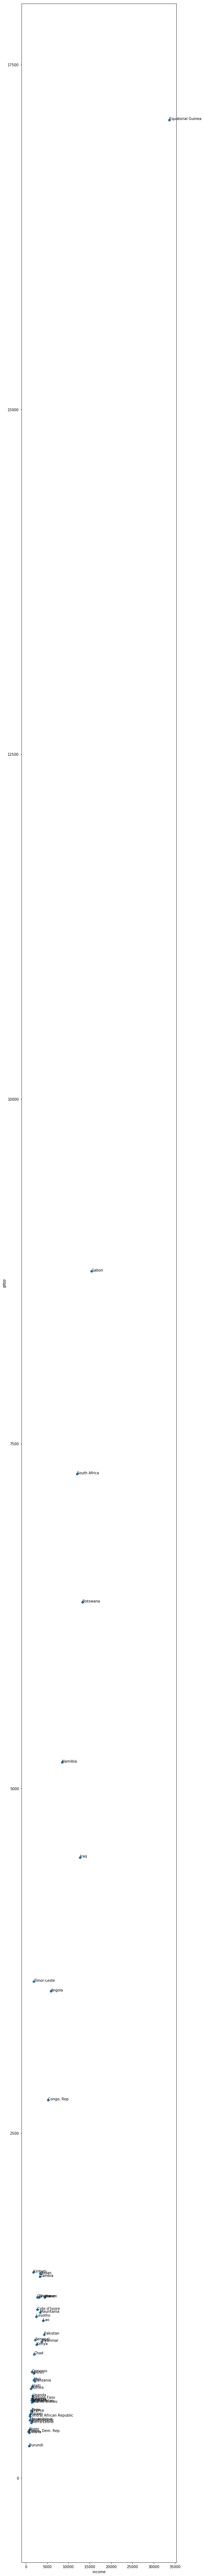

In [248]:
 # Let's plot them to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,100))
plt.scatter(focus_countries_df.income, focus_countries_df.gdpp)
plt.xlabel('income')
plt.ylabel('gdpp')
for i, txt in enumerate(focus_countries_df.country):
    plt.annotate(txt, (focus_countries_df.income[i],focus_countries_df.gdpp[i]))
plt.tight_layout()
plt.show()

### Considering the lowest of both income and gdpp we get
>> 1. Burundi
>> 2. Liberia
>> 3. Niger
>> 4. Congo, Dem. Rep.
>> 5. Sierra Leone

### 10. Conclusion

#### However, the 5 countries identified earlier (Haiti, Sierra Leone, Chad, Central African Republic, Mali) when "child mortality" was also included are on the lower side here

### Therefore, the recommended top 5 countries needing the aid are (Haiti, Sierra Leone, Chad, Central African Republic, Mali)